# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [1]:
import numpy as np
import pandas as pd

# 2. Load data

In [13]:
df = pd.read_csv('spamsms-1.csv', encoding = 'latin-1')

# 3. Exploring and preparing the data 

In [14]:
df.head()

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
type          5572 non-null object
text          5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## a) Find the distribution of target variable (Class) 


In [17]:
df['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

## b) Plot the distribution of target variable using histogram

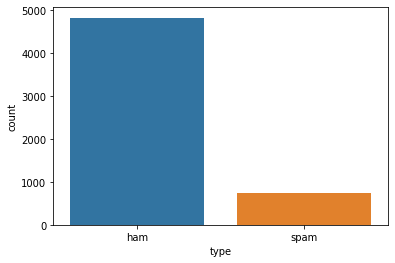

In [18]:
import seaborn as sns
sns.countplot('type', data = df)

## c) Summary Statistics and explain insights for at least 2 variables

# 4. Create training and test datasets

In [28]:
from sklearn.model_selection import train_test_split
x = df.drop('type', axis=1)
y = df['type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

# 5. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


Here, as this the dataset which requires some Text Analytics. This might not yet come into your notice, hence giving the 
solution for the reference. This may be helpful in the future concepts.

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.

In [29]:
#Data preparation – splitting text documents into words
from sklearn.feature_extraction.text import CountVectorizer
def text_process (x):
    return x.split()
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))

15585


In [30]:
print(bow_transformer.get_feature_names()[0])
print(bow_transformer.get_feature_names()[15584])

!
åÔrents


In [31]:
#Data preparation – creating indicator features for frequent words
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

NameError: name 'TfidfTransformer' is not defined

# 6. Create indicator features for frequent words

In [ ]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

# 7. Train a model on the data

In [ ]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [ ]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

In [ ]:
y_pred = spam_detect_model.predict(messages_tfidf)
print(y_pred)

In [ ]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

# 9. Measure performance for classifcation

In [ ]:
df_table = confusion_matrix(y_test,y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))